In [29]:
from PIL import Image
import requests
from transformers import ChineseCLIPProcessor, ChineseCLIPModel
import torch
import glob, json,os
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

model = ChineseCLIPModel.from_pretrained(r"/root/autodl-tmp/models/chinese-clip-vit-base-patch16/") # 中文clip模型
processor = ChineseCLIPProcessor.from_pretrained(r"/root/autodl-tmp/models/chinese-clip-vit-base-patch16/") # 预处理


'''图像编码(预处理)提取特征'''
# 初始化一个空列表，用于存储所有批次的图像特征
img_image_feat = []

# 本地图片路径
image_folder = r"./images"
all_img_paths = [
    os.path.join(image_folder, fname)
    for fname in os.listdir(image_folder)
    if fname.lower().endswith((".png", ".jpg", ".jpeg"))
]

# 设置每批处理的图像数量
batch_size = 5

# 遍历所有批次（总批次数 = 总图像数//批次大小 + 1）
for idx in tqdm(range(len(all_img_paths) // batch_size + 1)):
    # 获取当前批次的图像路径
    batch_paths = all_img_paths [idx * batch_size: (idx + 1) * batch_size]

    # 打开当前批次的所有图像文件
    imgs = [Image.open(path) for path in batch_paths]

    # 如果当前批次没有图像，则终止循环
    if len(imgs) == 0:
        break

    # 使用预处理工具将PIL图像转换为模型输入格式（PyTorch tensors）
    inputs = processor(images=imgs, return_tensors="pt")

    # 在不计算梯度的情况下进行推理（节省内存）
    with torch.no_grad():
        # 提取图像特征（输出为PyTorch张量）
        image_features = model.get_image_features(**inputs)

        # 将特征转换为NumPy数组格式
        image_features = image_features.data.numpy()

        # 将当前批次的特征添加到结果列表
        img_image_feat.append(image_features)

# 注意：原代码此处有break，会导致只处理第一个批次！实际使用时应该移除
# break  # 删除此行以处理所有批次

# 垂直堆叠所有批次的特征数组（形成二维数组：样本数×特征维度）
img_image_feat = np.vstack(img_image_feat)

# 对特征进行归一化处理（通常是L2归一化）
img_image_feat = normalize(img_image_feat)

/root/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/3 [00:00<?, ?it/s]

输入文本:  一只小鸟在树枝上


([], [])

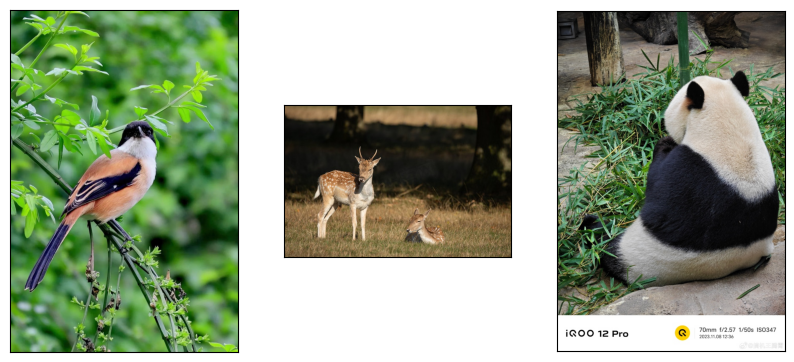

In [30]:
img_texts_feat = []
batch_size = 5
query = "一只小鸟在树枝上"

inputs = processor(text=[query], return_tensors="pt", padding=True)

with torch.no_grad():
    # 调用模型的文本特征提取方法，得到当前批次的文本嵌入向量
    # 不同模型方法名可能不同（如CLIP是get_text_features，BLIP可能是encode_text），需适配具体模型
    text_features = model.get_text_features(**inputs)

    # 将PyTorch张量转换为NumPy数组（方便后续拼接和归一化）
    text_features = text_features.data.numpy()

    # 将当前批次的文本特征添加到列表中
    img_texts_feat.append(text_features)

img_texts_feat = np.array(img_texts_feat)
img_texts_feat = normalize(img_texts_feat[0])

query_idx = 0

sim_result = np.dot(img_texts_feat[query_idx], img_image_feat.T) # 矩阵计算
sim_idx = sim_result.argsort()[::-1][0:4]

print('输入文本: ', query)

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(Image.open(all_img_paths[sim_idx[0]]))
plt.xticks([]); plt.yticks([])

plt.subplot(132)
plt.imshow(Image.open(all_img_paths[sim_idx[1]]))
plt.xticks([]); plt.yticks([])

plt.subplot(133)
plt.imshow(Image.open(all_img_paths[sim_idx[2]]))
plt.xticks([]); plt.yticks([])

输入文本:  一只大熊猫


([], [])

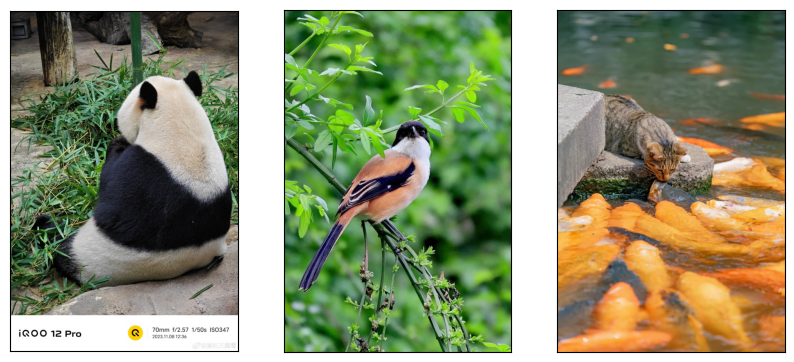

In [28]:
img_texts_feat = []
batch_size = 5
query = "一只大熊猫"

inputs = processor(text=[query], return_tensors="pt", padding=True)

with torch.no_grad():
    # 调用模型的文本特征提取方法，得到当前批次的文本嵌入向量
    # 不同模型方法名可能不同（如CLIP是get_text_features，BLIP可能是encode_text），需适配具体模型
    text_features = model.get_text_features(**inputs)

    # 将PyTorch张量转换为NumPy数组（方便后续拼接和归一化）
    text_features = text_features.data.numpy()

    # 将当前批次的文本特征添加到列表中
    img_texts_feat.append(text_features)

img_texts_feat = np.array(img_texts_feat)
img_texts_feat = normalize(img_texts_feat[0])

query_idx = 0

sim_result = np.dot(img_texts_feat[query_idx], img_image_feat.T) # 矩阵计算
sim_idx = sim_result.argsort()[::-1][0:4]

print('输入文本: ', query)

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(Image.open(all_img_paths[sim_idx[0]]))
plt.xticks([]); plt.yticks([])

plt.subplot(132)
plt.imshow(Image.open(all_img_paths[sim_idx[1]]))
plt.xticks([]); plt.yticks([])

plt.subplot(133)
plt.imshow(Image.open(all_img_paths[sim_idx[2]]))
plt.xticks([]); plt.yticks([])

In [6]:
np.dot(img_texts_feat[query_idx], img_image_feat.T) 

array([[10.025233 , 16.136156 , 11.136946 , 12.7570915, 12.685003 ,
        11.910078 , 11.998109 , 13.73234  , 10.717419 , 10.902388 ]],
      dtype=float32)

文本识别结果:  ['一只悠闲的猫趴在拖鞋上', '一位新粮四个姐妹开心的摆poss', '一只熊猫的背对着吃饭']


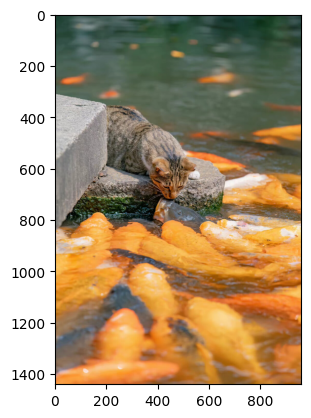

In [23]:
query_idx = 9

sim_result = np.dot(img_image_feat[query_idx], img_texts_feat.T)
sim_idx = sim_result.argsort()[::-1][1:4]

plt.imshow(Image.open(all_img_paths[query_idx]))

print('文本识别结果: ', [img_captions[x] for x in sim_idx])